In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('filename.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
df['language'].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: count, dtype: int64

In [7]:
def is_related_to_ukraine_or_russia(tweet):
    ukraine_keywords = ['ukraine', 'kiev', 'ukrainian']
    russia_keywords = ['russia', 'moscow', 'russian']
    
    for keyword in ukraine_keywords:
        if keyword in tweet.lower():
            return 'Ukraine'
    
    for keyword in russia_keywords:
        if keyword in tweet.lower():
            return 'Russia'
    
    return 'Other'

df['country_related'] = df['tweet'].apply(is_related_to_ukraine_or_russia)

df['country_related'].value_counts()

country_related
Russia     6265
Ukraine    3183
Other       566
Name: count, dtype: int64

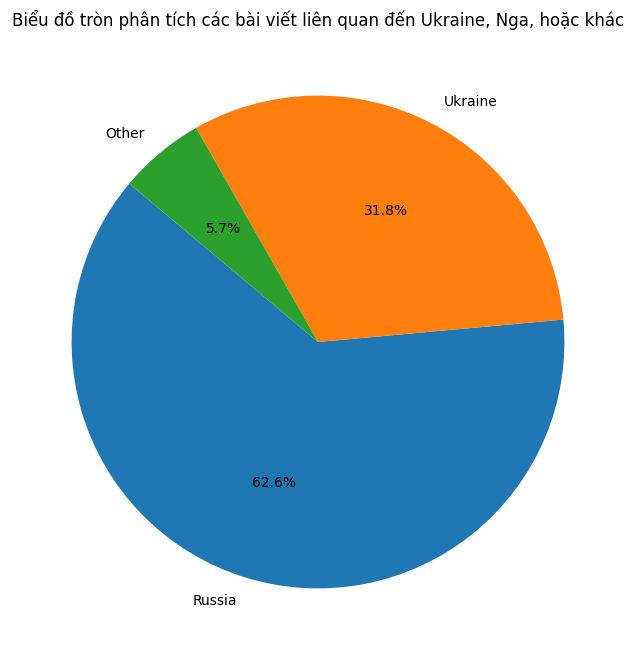

In [8]:
value_counts = df['country_related'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tròn phân tích các bài viết liên quan đến Ukraine, Nga, hoặc khác')
plt.show()

In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tranq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud

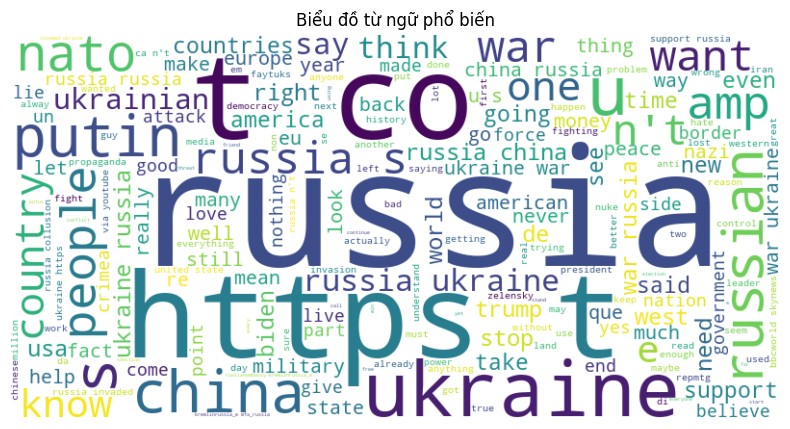

In [11]:
text = ' '.join(df['tweet'].astype(str))

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
tokens = word_tokenize(text)
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.lower() not in punctuations]
filtered_text = ' '.join(filtered_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Biểu đồ từ ngữ phổ biến')
plt.show()

In [12]:
from collections import Counter

In [13]:
break_frase = df['tweet'].apply(lambda Text: str(Text).split())
stop_words = set(stopwords.words('english'))
words = [item for sublist in break_frase for item in sublist if item.lower() not in stop_words]
rank = Counter(words)
quantity = pd.DataFrame(rank.most_common(20))
quantity.columns = ['Word', 'Qnt']
quantity

,Word,Qnt
0,Russia,5980
1,Ukraine,1932
2,war,1093
3,China,994
4,Russia.,932
5,US,775
6,would,729
7,like,678
8,&amp;,643
9,Russian,604


In [14]:
import plotly.express as px

quantity_words = px.bar(quantity,x='Qnt',y= 'Word',color= 'Word',orientation= 'h',width= 700,height= 700)

quantity_words.show()